<a href="https://colab.research.google.com/github/francusi/CoderDS/blob/main/ProyectoDSParteIBarrionuevo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final DS
## Entrega N° 1
---

## Abstract

Este proyecto se centra en el análisis exploratorio de los datos de usos del sistema de transporte público SUBE en la ciudad de Rosario, provincia de Santa Fe, utilizando datasets provistos por la entidad SUBE que abarcan los años 2022, 2023 y 2024. Cada dataset contiene aproximadamente 450 mil registros con información detallada sobre cada transacción, incluyendo fecha, empresa, línea, tipo de transporte, jurisdicción y cantidad de usos.

El objetivo principal es explorar y comprender los patrones de uso del transporte público en Rosario a través de un análisis descriptivo y temporal. Se buscará identificar tendencias en la cantidad de pasajeros a lo largo del tiempo (diaria y mensualmente), analizar la distribución de usos por línea y empresa, y detectar posibles patrones estacionales o cambios significativos en la demanda.

Este análisis resulta especialmente relevante en el contexto actual, donde la movilidad urbana constituye un eje central para la planificación de políticas públicas, la asignación de recursos y la mejora en la experiencia de los usuarios. Conocer cómo se comporta la demanda del transporte público permite identificar horarios de mayor carga, líneas con mayor participación relativa y posibles desequilibrios entre oferta y demanda.

Para llevar adelante este estudio se aplicarán técnicas de análisis univariado, bivariado y multivariado, apoyadas en resúmenes numéricos y visualizaciones interactivas. Se emplearán librerías de Python como pandas, Matplotlib, Seaborn y Plotly para garantizar un enfoque claro y didáctico en la exploración de los datos.

En esta primera etapa no se busca generar modelos predictivos, sino sentar las bases para un entendimiento sólido del fenómeno. Los resultados obtenidos constituirán un insumo clave para futuros análisis que podrían incluir predicciones de la demanda, segmentación de empresas y evaluación del impacto de políticas de transporte.

---



## Preguntas / Hipótesis de Interés

1.  ¿Cuales son las lineas de colectivo mas demandadas por los usuarios?
¿Cual es la proporcion de mercado que maneja cada empresa segun los viajes realizados?
2.  ¿Existen variaciones en la cantidad de viajes a lo largo de los años?
3.  ¿Cuales dias son aquellos en que los usurios utilizan mas el transporte publico?

## Objetivo del Proyecto

El objetivo principal de este proyecto es realizar un análisis exploratorio y descriptivo de los datos de uso del sistema de transporte público SUBE en la ciudad de Rosario entre 2022 y 2024. Se busca comprender los patrones de comportamiento de los usuarios, identificar tendencias temporales (diarias, mensuales y anuales), analizar la distribución de usos por líneas y empresas, y validar o refutar las preguntas planteadas. Este análisis proporcionará una base sólida para entender la dinámica del transporte público en la región y podrá servir como punto de partida para estudios más avanzados, como la optimización de rutas o la planificación de servicios.


---



In [1]:
# Carga de datasets SUBE desde mi repositorio google drive (2022, 2023, 2024)

from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/drive')

# Rutas a los archivos
base_path = "/content/drive/MyDrive/CURSOS/DS1-CD/Datasets/"
files = {
    "2022": base_path + "dat-sube-usos-2022.csv",
    "2023": base_path + "dat-sube-usos-2023.csv",
    "2024": base_path + "dat-sube-usos-2024.csv",
}

# Leo datasets y guardo en un diccionario
dfs = {}
for year, path in files.items():
    dfs[year] = pd.read_csv(path)
    dfs[year]["anio"] = int(year)  # agregar columna de año como indice

# Unimos todo en un solo DataFrame
df = pd.concat(dfs.values(), ignore_index=True)
print("Tamaño del dataset:", df.shape)
df.head()


Mounted at /content/drive
Tamaño del dataset: (1416304, 11)


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,anio
0,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,10,NO,2022
1,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,19,NO,2022
2,2022-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO,2022
3,2022-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,675,NO,2022
4,2022-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO,2022


In [2]:
# Filtrar por Provincia y Municipio
df_filtrado = df[(df['PROVINCIA'] == 'SANTA FE') & (df['MUNICIPIO'] == 'ROSARIO')].copy()

print("Tamaño del dataset filtrado:", df_filtrado.shape)

df_filtrado.head()

Tamaño del dataset filtrado: (27693, 11)


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,anio
487365,2023-02-10,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,28,NO,2023
489621,2023-02-12,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,3,NO,2023
490839,2023-02-13,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023
509121,2023-02-28,MOVI ROSARIO S.A.U,LINEA_112,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023
509122,2023-02-28,MOVI ROSARIO S.A.U,LINEA_115_AEROPUERTO,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023


En base al analsis anterior, vamos a verificar si existen datos en el año 2022 para la ciudad de Rosario.

In [5]:
# Filtramos por el año y guardamos
df_filtrado_2022 = df_filtrado[(df_filtrado['anio'] == 2022) & (df_filtrado['MUNICIPIO'] == "ROSARIO")]

# Imprimimos un mensaje con el resultado
if df_filtrado_2022.empty:
    print("No existen datos de usos diarios para el año 2022 en el dataset filtrado.")
else:
    print("Existen datos de usos diarios para el año 2022 en el dataset filtrado. Primeras filas:")
    display(df_filtrado_2022.head())

No existen datos de usos diarios para el año 2022 en el dataset filtrado.


## Missing Values

Con este codigo identificamos y mostramos si existen valores faltantes en cada columna del dataframe

In [6]:
missing = df_filtrado.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


Observado el resultado podemos ver que no existen valores faltantes en nuestro df.


In [7]:
# Convertimos 'DIA_TRANSPORTE' a datetime
df_filtrado['DIA_TRANSPORTE'] = pd.to_datetime(df_filtrado['DIA_TRANSPORTE'])


## Análisis por Línea y Empresa (Univariado)

Identificamos las líneas y empresas de transporte con mayor volumen de usos en Rosario y analizamos su distribución.

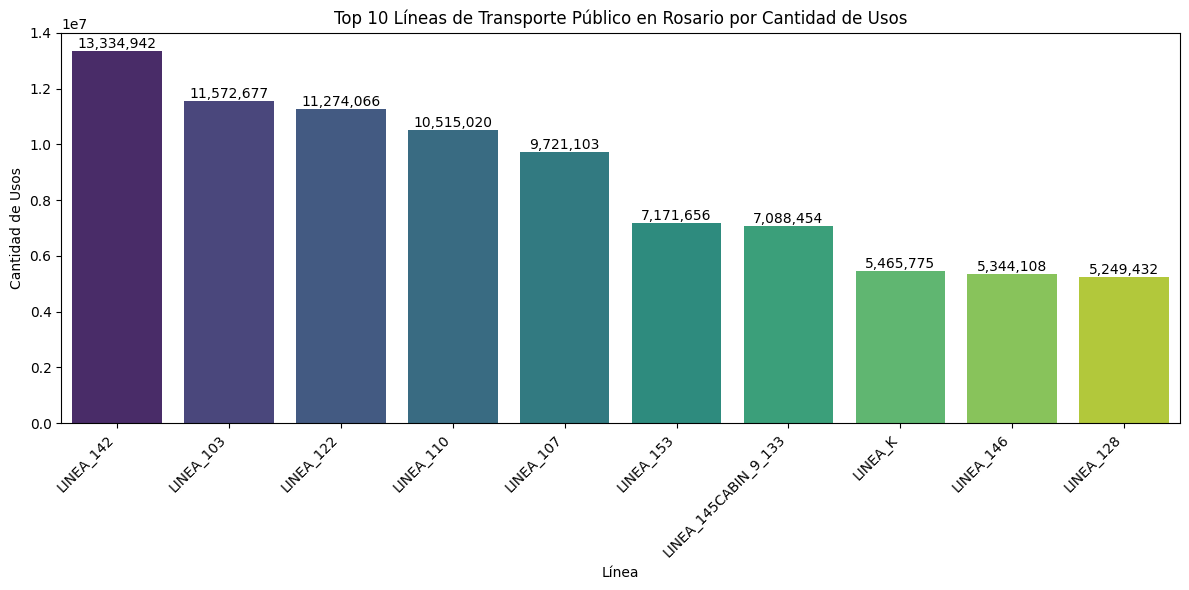

,NOMBRE_EMPRESA,CANTIDAD
0,ROSARIO BUS S.A,112.091.140
1,MOVI ROSARIO S.A.U,64.099.957


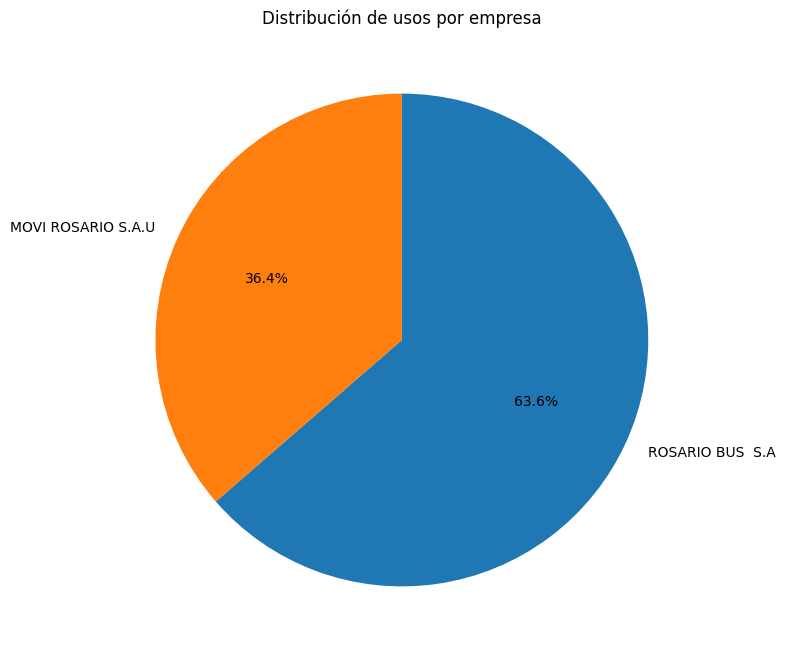

In [8]:
# Agrupamos por linea, sumamos los usos y ordenamos por orden descendente
usos_por_linea = df_filtrado.groupby('LINEA')['CANTIDAD'].sum().sort_values(ascending=False)

# Seleccionamos top 10 lineas mas usadas
top_10_lineas = usos_por_linea.head(10)

# Graficamos top 10 mediante grafico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_lineas.index, y=top_10_lineas.values, hue=top_10_lineas.index, palette='viridis', legend=False)
plt.title('Top 10 Líneas de Transporte Público en Rosario por Cantidad de Usos')
plt.xlabel('Línea')
plt.ylabel('Cantidad de Usos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadimos valores a las barras y configuramos separador de miles
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

# Agrupamos por empresa y sumamos usos
usos_por_empresa = df_filtrado.groupby('NOMBRE_EMPRESA')['CANTIDAD'].sum().sort_values(ascending=False)
usos_empresa_fmt = usos_por_empresa.reset_index()
usos_empresa_fmt["CANTIDAD"] = usos_empresa_fmt["CANTIDAD"].map("{:,.0f}".format).str.replace(",", ".")
display(usos_empresa_fmt)



# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(
    usos_por_empresa,
    labels=usos_por_empresa.index,
    autopct='%1.1f%%',   # muestra porcentajes con un decimal
    startangle=90,       # arranca el gráfico desde arriba
    counterclock=False   # para que vaya en sentido horario
)

plt.title("Distribución de usos por empresa")
plt.show()


## Evolución Anual 2023 - 2024 (Bivariado)


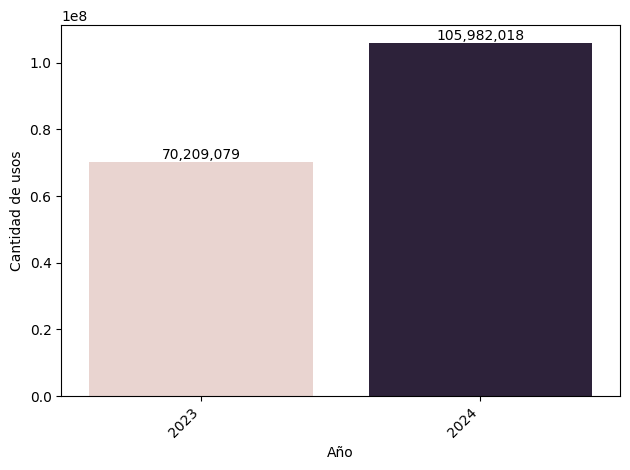

--- Análisis de Crecimiento Anual ---
El crecimiento de usos del 2023 al 2024 fue de: 50.95%


In [9]:
# Suponiendo que 'df_filtrado' y 'usos_anio' ya están definidos como en tu código original
df_filtrado['ANIO'] = df_filtrado['DIA_TRANSPORTE'].dt.year
usos_anio = df_filtrado.groupby('ANIO')['CANTIDAD'].sum()

# Crea el gráfico de barras
ax = sns.barplot(x=usos_anio.index, y=usos_anio.values, hue=usos_anio.index, legend=False)
plt.xlabel('Año')
plt.ylabel('Cantidad de usos')
plt.xticks(rotation=45, ha='right')

# Agrega las etiquetas de texto en cada barra
for index, value in enumerate(usos_anio):
    ax.text(index, value, f'{int(value):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# .pct_change() calcula el cambio fraccional, lo multiplicamos por 100
crecimiento = usos_anio.pct_change() * 100

# 3. Seleccionar el valor de crecimiento para 2024
crecimiento_2024 = crecimiento.loc[2024]

# 4. Imprimir el mensaje informativo en la consola
print("--- Análisis de Crecimiento Anual ---")
print(f"El crecimiento de usos del 2023 al 2024 fue de: {crecimiento_2024:.2f}%")

## Analisis Multivariado


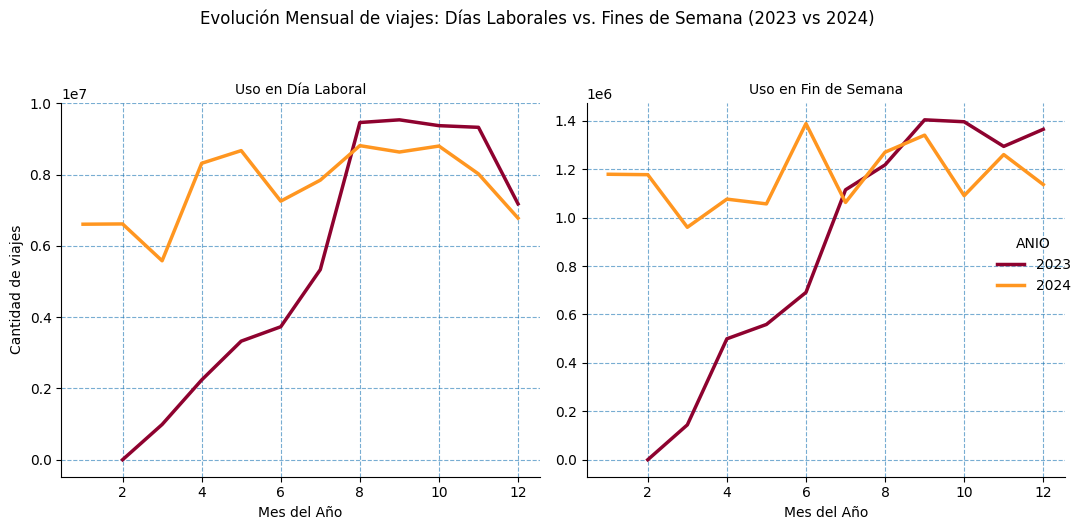

In [12]:
# Segmentamos los dias por dia laboral o fin de semana
df_filtrado['TIPO_DIA'] = df_filtrado['DIA_TRANSPORTE'].dt.weekday.apply(lambda x: 'Día Laboral' if x < 5 else 'Fin de Semana')

# Extraemos mes de la columna 'DIA_TRANSPORTE'
df_filtrado['MES'] = df_filtrado['DIA_TRANSPORTE'].dt.month

# Agrupamos por año, mes, dia y sumamos la cantidad de viajes
usos_mensuales_tipodia = df_filtrado.groupby(['ANIO', 'MES', 'TIPO_DIA'])['CANTIDAD'].sum().reset_index()

# Usamos relplot que es ideal para crear subplots
g = sns.relplot(
    data=usos_mensuales_tipodia,
    x='MES',
    y='CANTIDAD',
    hue='ANIO',          # El color diferenciará el año
    col='TIPO_DIA',      # ESTA LÍNEA CREA LOS DOS GRÁFICOS SEPARADOS
    kind='line',         # Le decimos que queremos un gráfico de líneas
    lw=2.5,              # Hacemos las líneas un poco más gruesas
    palette=['#8E022F', '#FF9620'], # Paleta de colores (gris para el pasado, azul para el presente)
    facet_kws={'sharey': False} # MUY IMPORTANTE: Permite que cada gráfico tenga su propia escala Y
)

# Mejoramos los títulos y etiquetas para mayor claridad
g.fig.suptitle('Evolución Mensual de viajes: Días Laborales vs. Fines de Semana (2023 vs 2024)', y=1.05)
g.set_axis_labels("Mes del Año", "Cantidad de viajes")
g.set_titles("Uso en {col_name}") # Títulos dinámicos para cada subplot
g.map(plt.grid, linestyle='--', alpha=0.6) # Añade una grilla a cada gráfico

# Ajustamos para que se vea bien
plt.tight_layout()
plt.show()